In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [20]:
train_dir =r"C:\Users\abdal\Downloads\archive (1)\train" # Directory containing the training data
test_dir = r"C:\Users\abdal\Downloads\archive (1)\test" # Directory containing the validation data

In [21]:
train_datagen = ImageDataGenerator(
    width_shift_range = 0.1,        # Randomly shift the width of images by up to 10%
    height_shift_range = 0.1,       # Randomly shift the height of images by up to 10%
    horizontal_flip = True,         # Flip images horizontally at random
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

In [22]:
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,           # Directory containing the training data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "training"              # Uses the training subset of the data
)

validation_generator = validation_datagen.flow_from_directory(
    directory = test_dir,            # Directory containing the validation data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "validation"            # Uses the validation subset of the data
)

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [23]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Reshape, LSTM
from tensorflow.keras.models import Sequential
import tensorflow as tf 

# Define the model architecture
model = Sequential()

# CNN Feature Extraction
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten and reshape output to fit LSTM input format
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Reshape to (time_steps, features) for LSTM
model.add(Reshape((1, 256)))  # تحويل المخرجات لتناسب LSTM

# LSTM Layers
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dropout(0.5))

# Fully connected layer
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])


In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the callback
checkpoint_callback = ModelCheckpoint(
    filepath='model_weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

# Train the model with the callback
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint_callback]
)

Epoch 1/50
359/359 [==============================] - ETA: 0s - loss: 2.7958 - accuracy: 0.1786
Epoch 1: val_accuracy improved from -inf to 0.16411, saving model to model_weights.h5
359/359 [==============================] - 75s 204ms/step - loss: 2.7958 - accuracy: 0.1786 - val_loss: 2.2963 - val_accuracy: 0.1641
Epoch 2/50
359/359 [==============================] - ETA: 0s - loss: 2.4254 - accuracy: 0.2120
Epoch 2: val_accuracy improved from 0.16411 to 0.31634, saving model to model_weights.h5
359/359 [==============================] - 17s 46ms/step - loss: 2.4254 - accuracy: 0.2120 - val_loss: 1.7823 - val_accuracy: 0.3163
Epoch 3/50
358/359 [============================>.] - ETA: 0s - loss: 2.2506 - accuracy: 0.2488
Epoch 3: val_accuracy improved from 0.31634 to 0.35265, saving model to model_weights.h5
359/359 [==============================] - 19s 53ms/step - loss: 2.2503 - accuracy: 0.2488 - val_loss: 1.7143 - val_accuracy: 0.3527
Epoch 4/50
359/359 [============================

In [27]:
import matplotlib.pyplot as plt


## Evaluation

### Training and validation loss curves

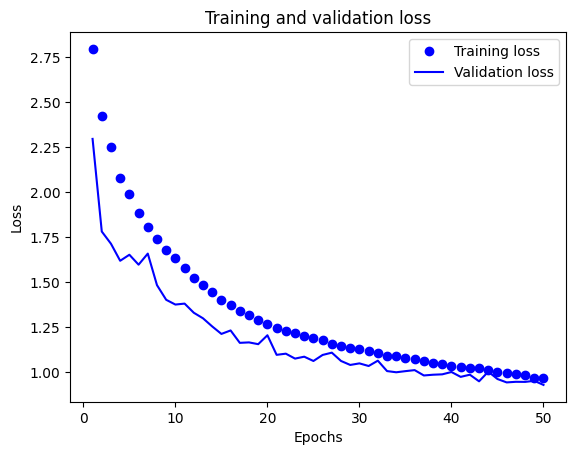

In [28]:
# Plot the train and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Training and validation accuracy curves

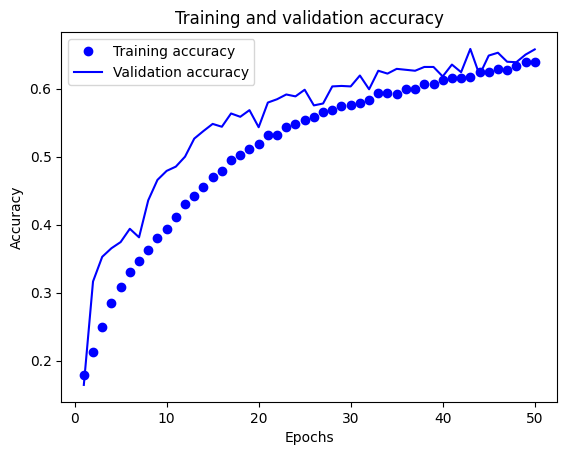

In [29]:
# Plot the train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Confusion Matrix

23/23 [==============================] - 14s 634ms/step


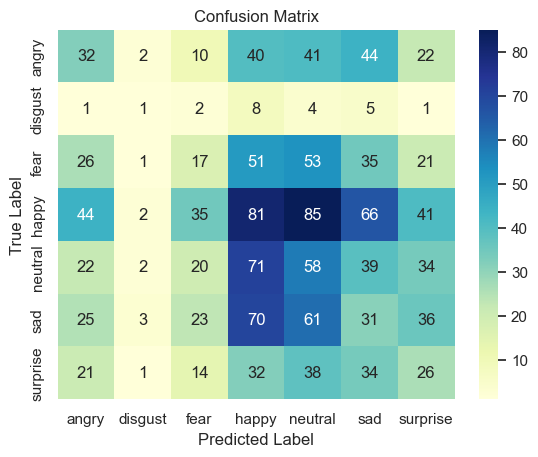

In [31]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
import numpy as np

# Get the true labels and predicted labels for the validation set
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Found 7178 images belonging to 7 classes.
1/1 [==============================] - 0s 92ms/step


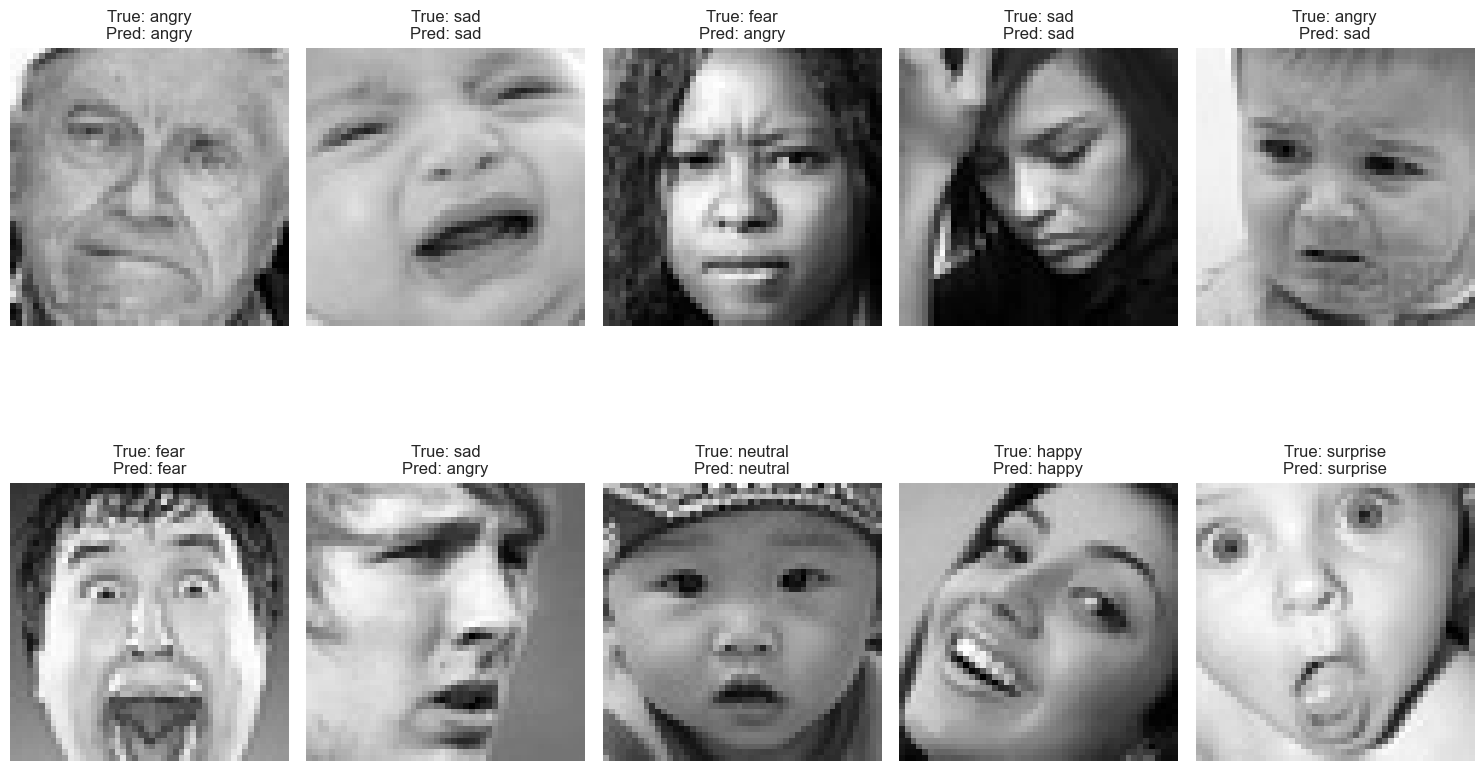

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os

# Load the trained model weights (ensure that 'model_weights.h5' exists)
model.load_weights('model_weights.h5')

# Define the class labels based on your dataset
class_labels = list(train_generator.class_indices.keys())  # ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load and preprocess 10 test images from the test directory
test_images_dir = r"C:\Users\abdal\Downloads\archive (1)\test"  # Change this to your test directory if needed
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    directory=test_images_dir,
    target_size=(48, 48),
    batch_size=10,
    color_mode="grayscale",
    class_mode="categorical",
    shuffle=True  # Shuffle to get random images for testing
)

# Get a batch of 10 test images and labels
test_images, test_labels = next(test_generator)

# Predict on the batch of test images
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# Display the results
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].reshape(48, 48), cmap='gray')
    plt.title(f"True: {class_labels[true_classes[i]]}\nPred: {class_labels[predicted_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [39]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


718/718 [==============================] - 4s 5ms/step - loss: 1.0095 - accuracy: 0.6240
Test Accuracy: 62.40%
